In [4]:
import numpy as np
from scipy import linalg, array, dot, stats
import math
import matplotlib.pyplot as plt

def calParam(N=2, X=array([[2],[2]])):
    X_mean = [0, 0]
    X_mean[0] = sum(X[:,0]) / len(X[:,0])
    X_mean[1] = sum(X[:,1]) / len(X[:,1])
    X_mean = np.asarray(X_mean)
    Cov = np.zeros((2,2))
    for i in range(N):
        Cov += (X[i,:] - X_mean)*np.array([X[i,:] - X_mean]).T
    Cov /= N-1
    return X_mean, Cov

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def plotMult2dcov(Mean=array([[0],[0]]), Cov=array([[1,0],[0,2]]), k=1, N=50):
    m = len(Mean[0,:])
    A = np.zeros((2,2,m))
    for i in range(m):
        A[:,:,i] = linalg.cholesky(Cov[:,:,i],lower=True)
    alpha = np.linspace(0, 2*math.pi, N)
    x = np.zeros((N,2))
    y = np.zeros((N,2,m))
    fig, ax = plt.subplots(1,1,figsize=(20,20))
    for i in range(N):
        x[i,0] = k*math.cos(alpha[i])
        x[i,1] = k*math.sin(alpha[i])
        for j in range(m):
            y[i,:,j] = dot(A[:,:,j], x[i,:]) + Mean[:,j].T
    plt.plot(x[:,0],x[:,1], 'r--')
    for i in range(m):
        Label = ' Step = ' + str(i)
        plt.plot(y[:,0,i],y[:,1,i],label=Label)
    ax.set_aspect('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

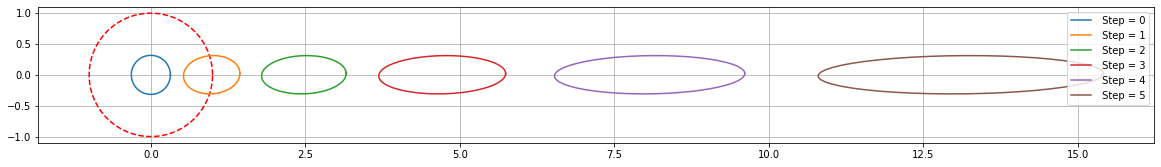

In [5]:
# 3A
N = 500
x = np.zeros((N,2,6))
X_mean = np.zeros((2,6))
Cov = np.zeros((2,2,6))
X_mean[:,0] = array([[0,0]])
Cov[:,:,0] = array([[0.1,0],[0,0.1]])
x[:,0,0] = np.random.normal(0, Cov[0,0,0]**0.5, N)
x[:,1,0] = np.random.normal(0, Cov[1,1,0]**0.5, N)

delta = 0.5
A = array([[1+delta,0],[0,1]])
b = array([[2*delta],[0]])
for i in [1,2,3,4,5]:
    for j in range(N):
        x[j,:,i] = dot(A, x[j,:,i-1]) + b.T

for i in [1,2,3,4,5]:
    S = False
    while(S == False):
        X_mean[:,i], Cov[:,:,i] = calParam(N,x[:,:,i])
        S = is_pos_def(Cov[:,:,i])
plotMult2dcov(X_mean, Cov, k=1, N=50)

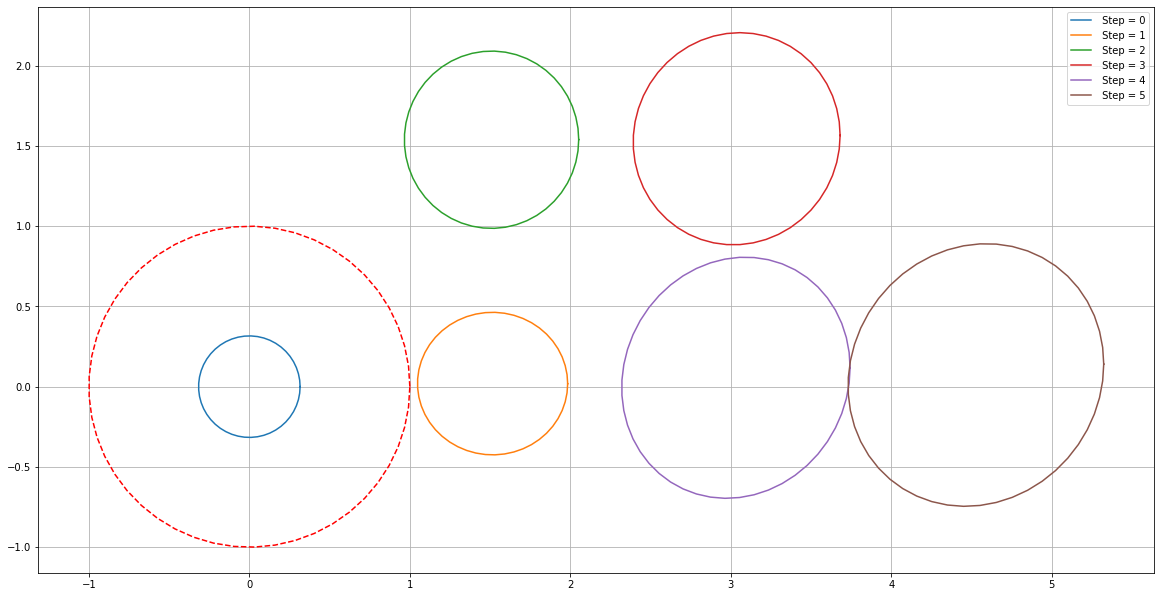

In [6]:
# 3C
u = array([[3,0,3,0,3],[0,3,0,-3,0]])
N = 500
x = np.zeros((N,2,6))
nu = np.zeros((N,2,5))
X_mean = np.zeros((2,6))
Cov = np.zeros((2,2,6))
X_mean[:,0] = array([[0,0]])
Cov[:,:,0] = array([[0.1,0],[0,0.1]])
x[:,0,0] = np.random.normal(0, Cov[0,0,0]**0.5, N)
x[:,1,0] = np.random.normal(0, Cov[1,1,0]**0.5, N)
for i in range(5):
    nu[:,0,i] = np.random.normal(0, 0.1**0.5, N)
    nu[:,1,i] = np.random.normal(0, 0.1**0.5, N)

delta = 0.5
A = array([[1,0],[0,1]])
B = array([[delta,0],[0,delta]])
for i in [1,2,3,4,5]:
    for j in range(N):
        x[j,:,i] = dot(A, x[j,:,i-1]) + dot(B, u[:,i-1]) + nu[j,:,i-1]

for i in [1,2,3,4,5]:
    S = False
    while(S == False):
        X_mean[:,i], Cov[:,:,i] = calParam(N,x[:,:,i])
        S = is_pos_def(Cov[:,:,i])

plotMult2dcov(X_mean, Cov, k=1, N=50)

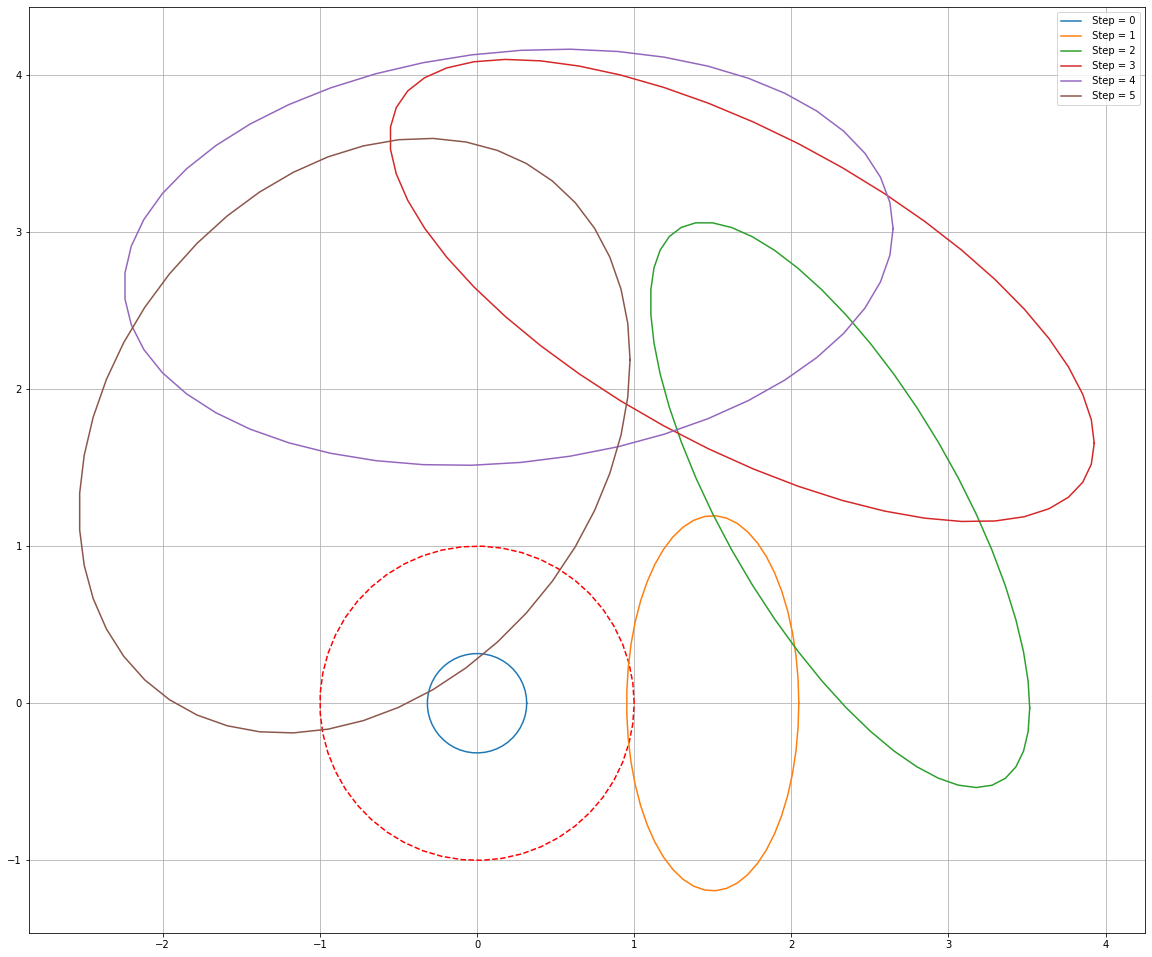

In [7]:
# 3D
u = array([[3],[2]])
X_mean = np.zeros((3,6))
Cov = np.zeros((3,3,6))
Cov[:,:,0] = array([[0.1,  0,  0],
                    [0,  0.1,  0],
                    [0,    0,0.5]])
R = array([[0.2,  0,  0],
           [0,  0.2,  0],
           [0,    0,0.1]])
G = np.zeros((3,3,6))
for i in [1,2,3,4,5]:
    X_mean[:,i] = array([float(X_mean[0,i-1] + delta*u[0]*math.cos(X_mean[2,i-1])),
                         float(X_mean[1,i-1] + delta*u[0]*math.sin(X_mean[2,i-1])),
                         float(X_mean[2,i-1] + delta*u[1])])
    G[:,:,i] = array([[1, 0, - delta*u[0]*math.sin(X_mean[2,i-1])],
                      [0, 1, delta*u[0]*math.cos(X_mean[2,i-1])],
                      [0, 0, 1]])
    Cov[:,:,i] = dot(G[:,:,i], dot(Cov[:,:,i-1], G[:,:,i].T)) + R
plotMult2dcov(X_mean[:2,:], Cov[:2,:2,:], k=1, N=50)

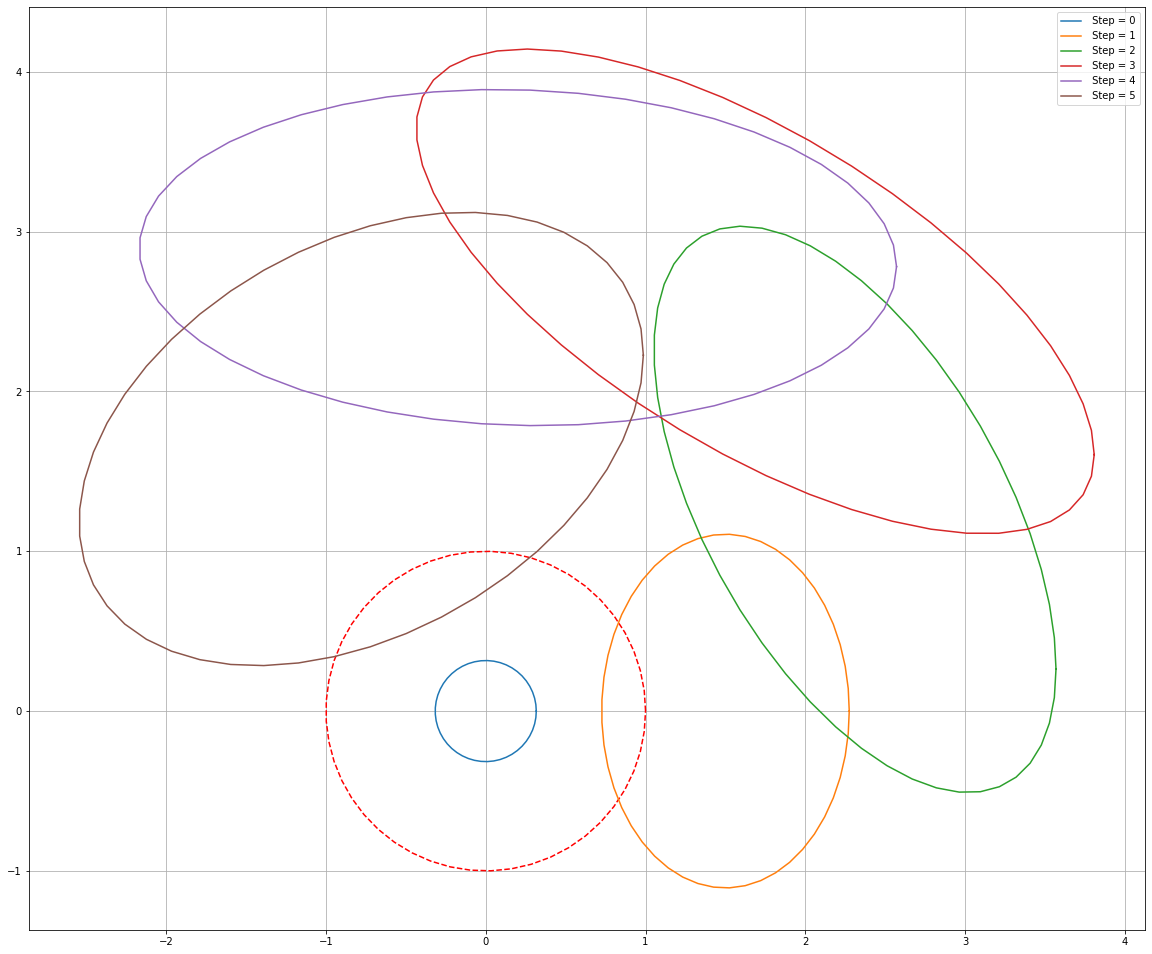

In [8]:
# 3E
u = array([[3],[2]])
X_mean = np.zeros((3,6))
Cov = np.zeros((3,3,6))
Cov[:,:,0] = array([[0.1,  0,  0],
                    [0,  0.1,  0],
                    [0,    0,0.5]])
R = array([[2,    0],
           [0,  0.1]])
G = np.zeros((3,3,6))
V = np.zeros((3,2,6))
for i in [1,2,3,4,5]:
    X_mean[:,i] = array([float(X_mean[0,i-1] + delta*u[0]*math.cos(X_mean[2,i-1])),
                         float(X_mean[1,i-1] + delta*u[0]*math.sin(X_mean[2,i-1])),
                         float(X_mean[2,i-1] + delta*u[1])])
    G[:,:,i] = array([[1, 0, - delta*u[0]*math.sin(X_mean[2,i-1])],
                      [0, 1, delta*u[0]*math.cos(X_mean[2,i-1])],
                      [0, 0, 1]])
    V[:,:,i] = array([[delta*math.cos(X_mean[2,i-1]), 0],
                      [delta*math.sin(X_mean[2,i-1]), 0],
                      [0,                        delta]])
    Cov[:,:,i] = dot(G[:,:,i], dot(Cov[:,:,i-1], G[:,:,i].T)) + dot(V[:,:,i], dot(R, V[:,:,i].T))
plotMult2dcov(X_mean[:2,:], Cov[:2,:2,:], k=1, N=50)